In [1]:
#Importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,f1_score,precision_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Reading the dataset
df=pd.read_csv('C:/Users/User/Documents/Data Trained/Data Science Class resources/DSData-master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#Checking the null values(if any)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

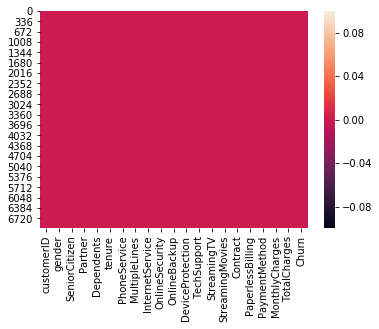

In [9]:
sns.heatmap(df.isnull())
plt.show()

In [10]:
#Statistical Summary of the Data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
#We can drop customer ID as it is not that much importance
df.drop(['customerID'],inplace=True,axis=1)

In [12]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['SeniorCitizen', 'tenure'], dtype='object'),
 dtype('float64'): Index(['MonthlyCharges'], dtype='object'),
 dtype('O'): Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
       dtype='object')}

In [13]:
for i in df:
    print(i)
    print(df[i].unique(),'\n')
    print(df[i].value_counts(),'\n')

gender
['Female' 'Male'] 

Male      3555
Female    3488
Name: gender, dtype: int64 

SeniorCitizen
[0 1] 

0    5901
1    1142
Name: SeniorCitizen, dtype: int64 

Partner
['Yes' 'No'] 

No     3641
Yes    3402
Name: Partner, dtype: int64 

Dependents
['No' 'Yes'] 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
64     80
56     80
16     80
     ... 
20     71
62     70
41     70
53     70
32     69
54     68
47     68
50     68
51     68
58     67
49     66
43     65
42     65
31 

In [14]:
df['gender'].replace(['Male','Female'],[0,1],inplace=True)

In [15]:
df['Partner'].replace(['Yes','No'],[0,1],inplace=True)

In [16]:
df['Dependents'].replace(['Yes','No'],[0,1],inplace=True)

In [17]:
df['PhoneService'].replace(['Yes','No'],[0,1],inplace=True)

In [18]:
df['MultipleLines'].replace(['No phone service','No', 'Yes'],[2,0,1],inplace=True)

In [19]:
df['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)

In [20]:
df['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [21]:
df['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [22]:
df['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [23]:
df['TechSupport'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [24]:
df['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [25]:
df['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [26]:
df['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)

In [27]:
df['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)

In [28]:
df['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)

In [29]:
df['Churn'].replace(['Yes','No'],[1,0],inplace=True)

In [30]:
#we have converted all the object data type to int64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(18), object(1)
memory usage: 1.1+ MB


In [31]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [32]:
df.loc[df['TotalCharges'].isna()==True]=0

In [33]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [34]:
#checking the correlation
dfcor=df.corr()

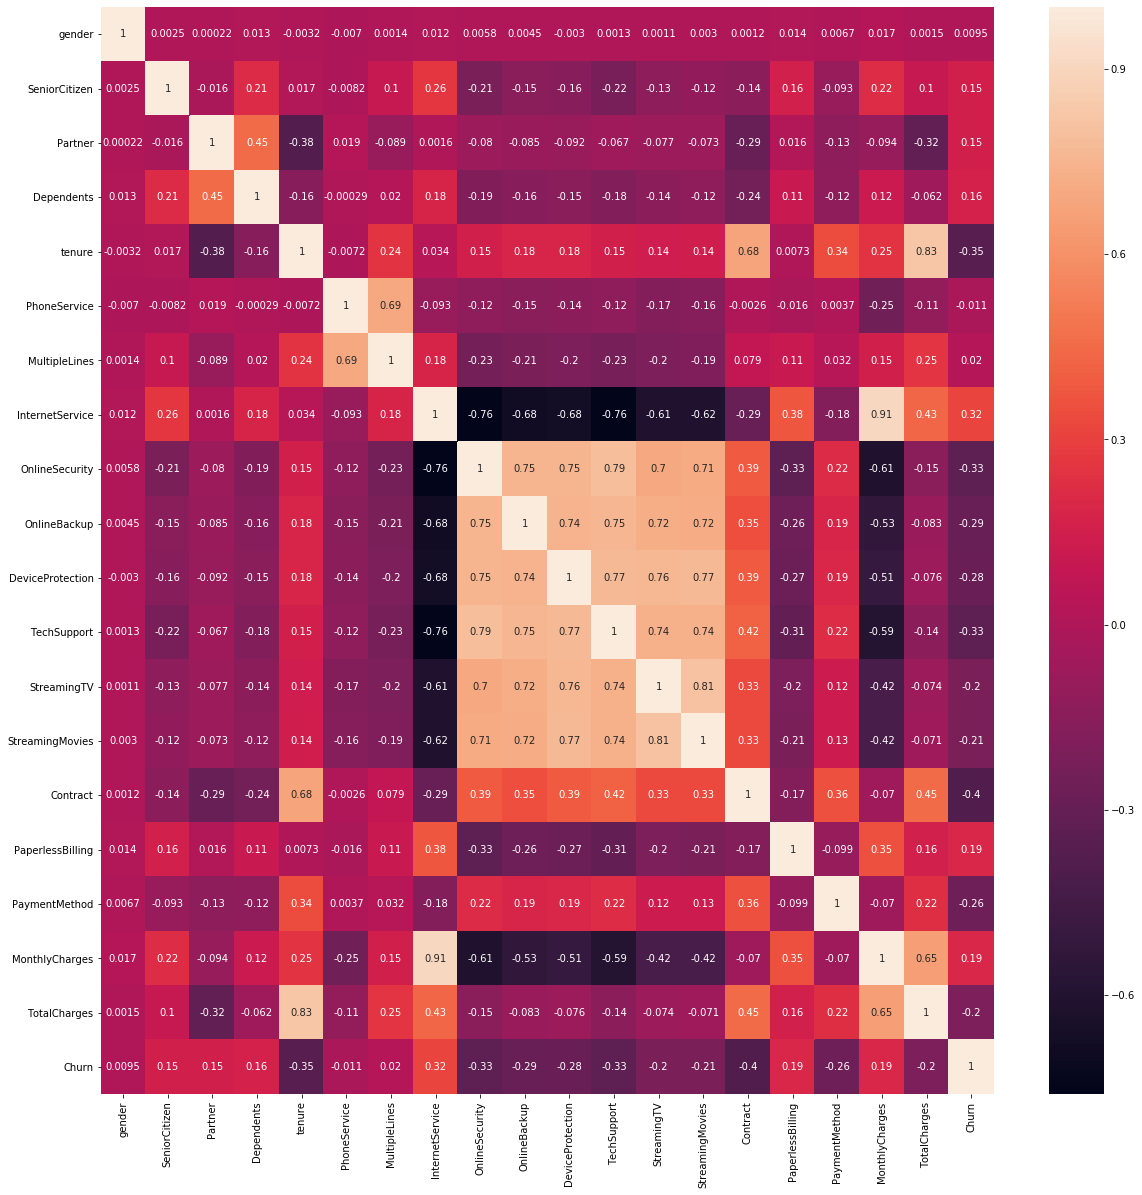

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(dfcor,annot=True)
plt.show()

In [36]:
#Univariate Analysis

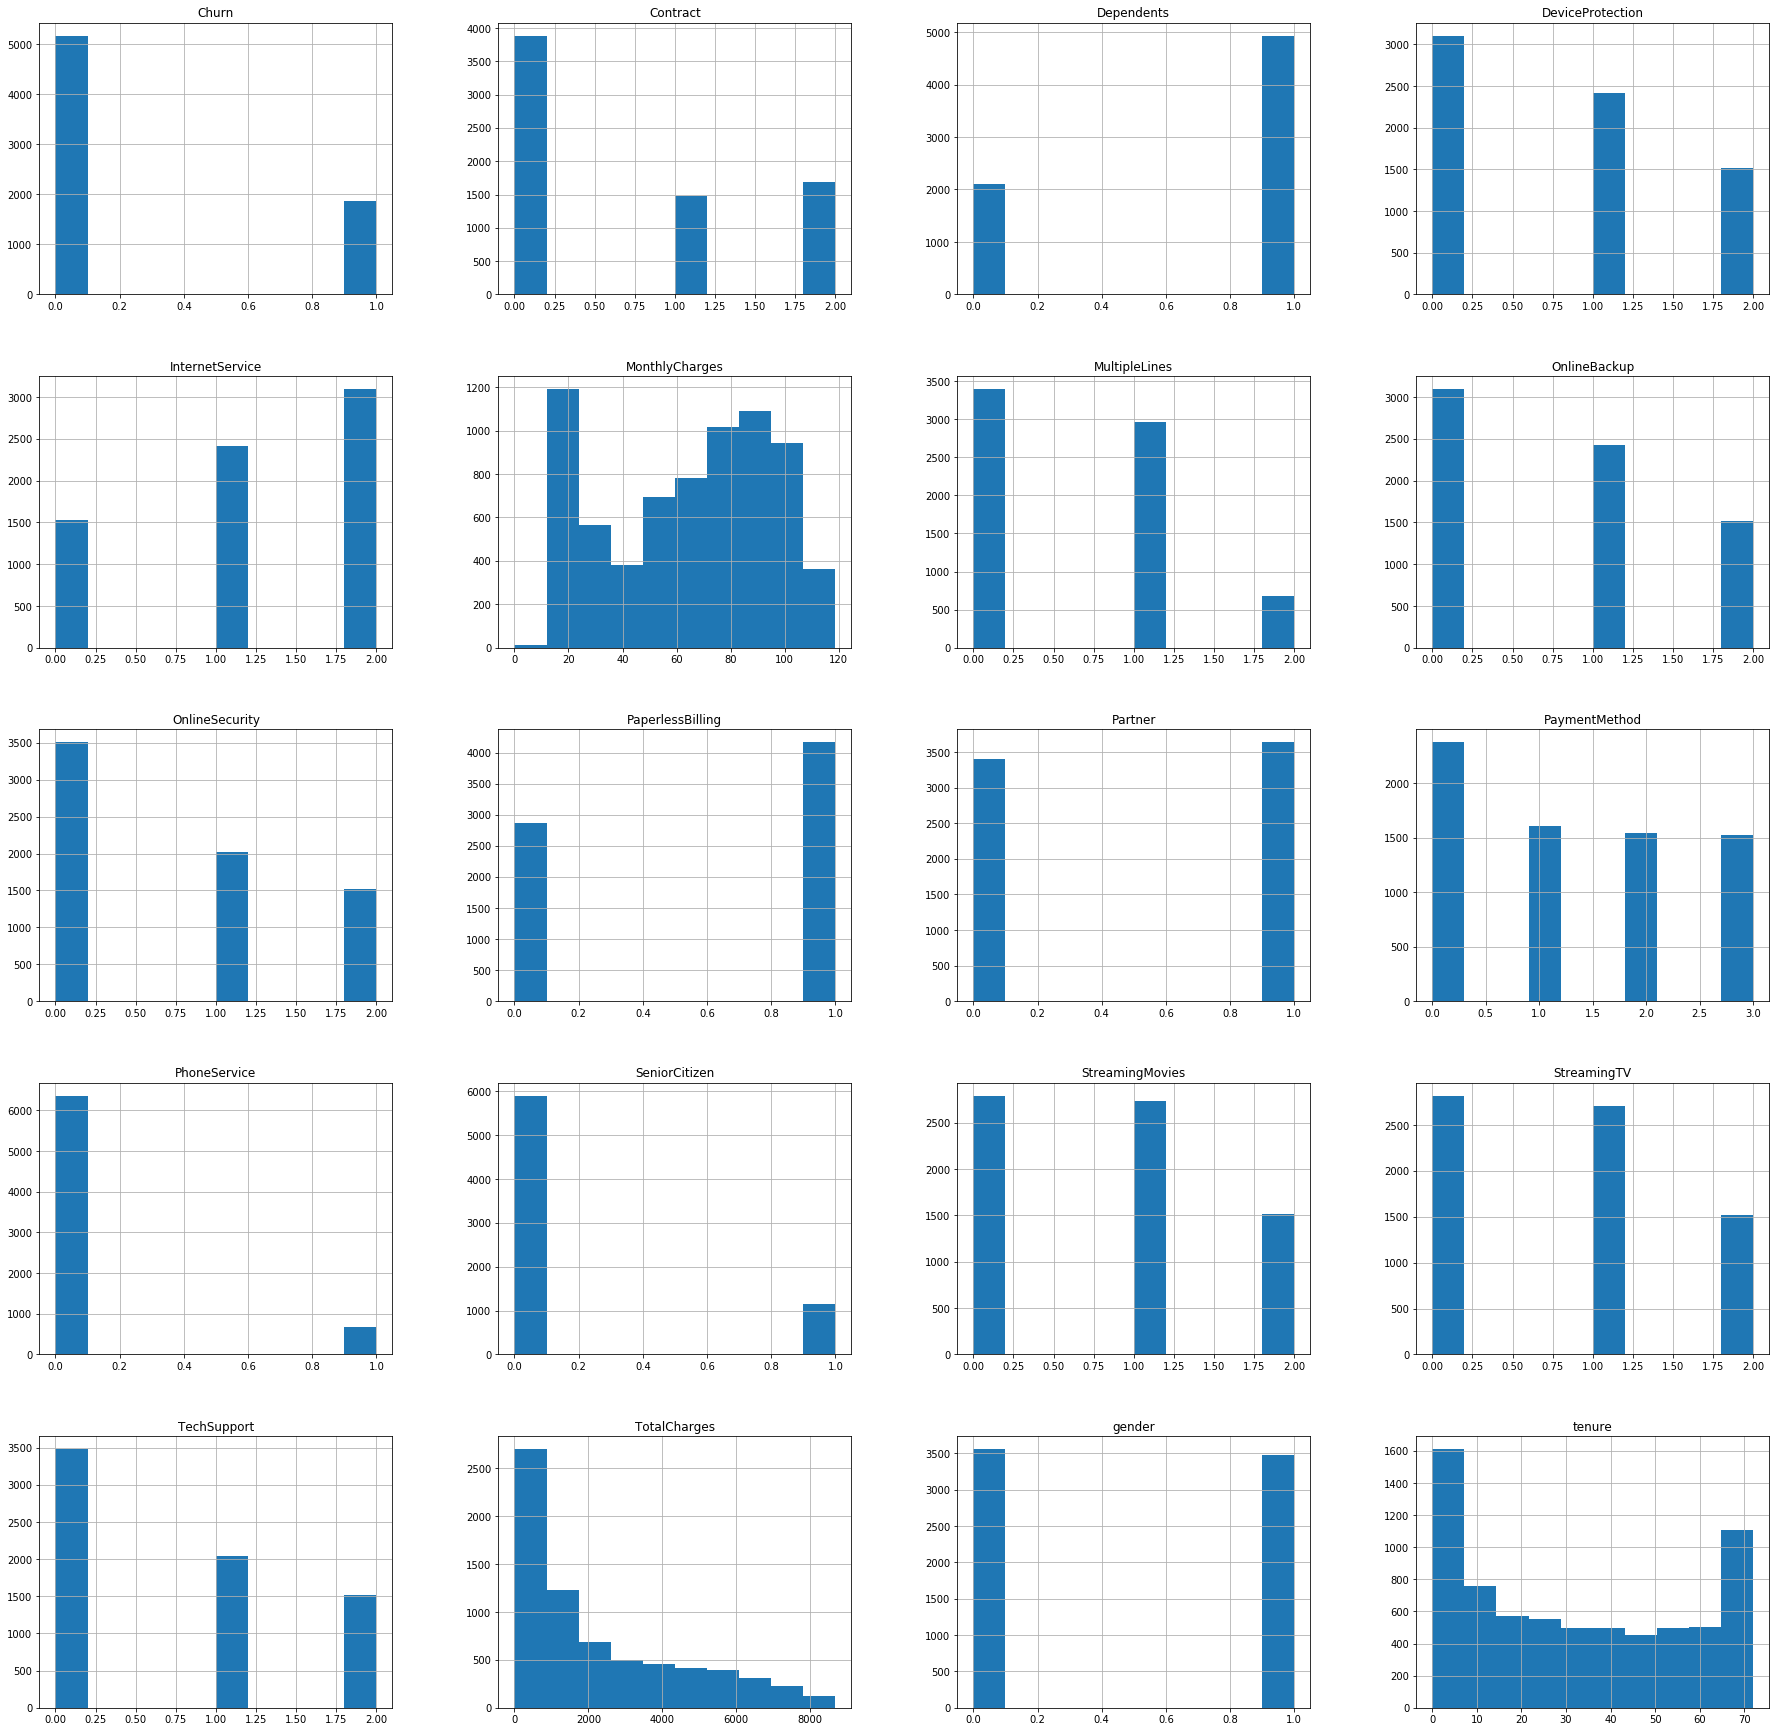

In [37]:
df.hist(figsize=(31,31))
plt.show()

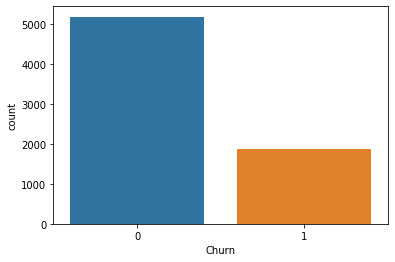

In [38]:
sns.countplot(x='Churn',data=df)
plt.show()

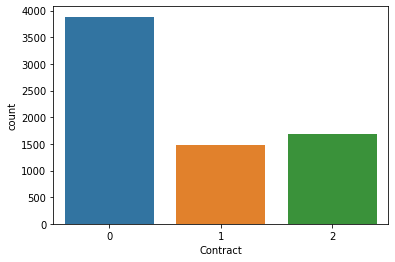

In [39]:
sns.countplot(x='Contract',data=df)
plt.show()

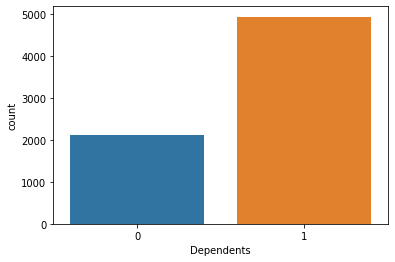

In [40]:
sns.countplot(x='Dependents',data=df)
plt.show()

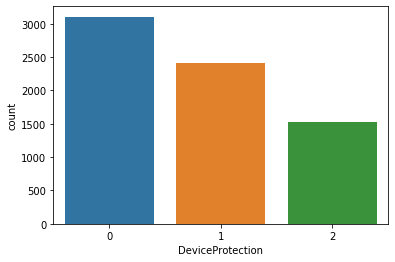

In [41]:
sns.countplot(x='DeviceProtection',data=df)
plt.show()

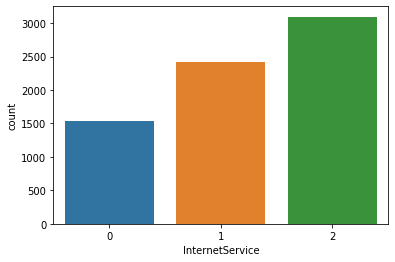

In [42]:
sns.countplot(x='InternetService',data=df)
plt.show()

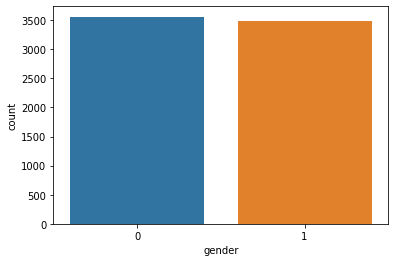

In [43]:
sns.countplot(x='gender',data=df)
plt.show()

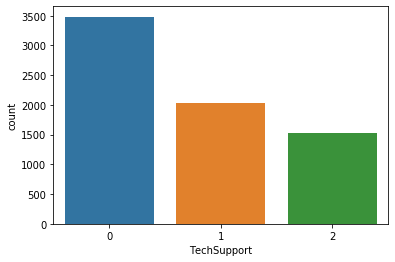

In [44]:
sns.countplot(x='TechSupport',data=df)
plt.show()

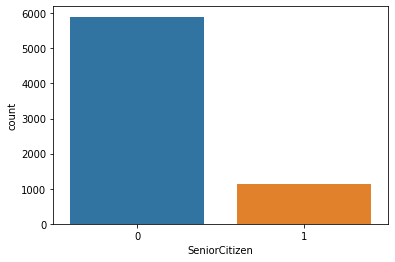

In [45]:
sns.countplot(x='SeniorCitizen',data=df)
plt.show()

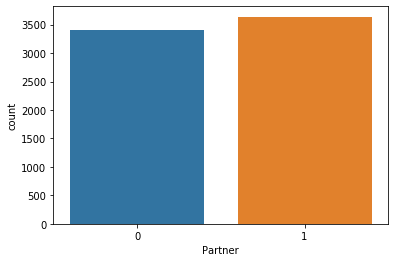

In [46]:
sns.countplot(x='Partner',data=df)
plt.show()

In [47]:
#checking the outliers
collist=df.columns.values
ncol=12
nrows=10

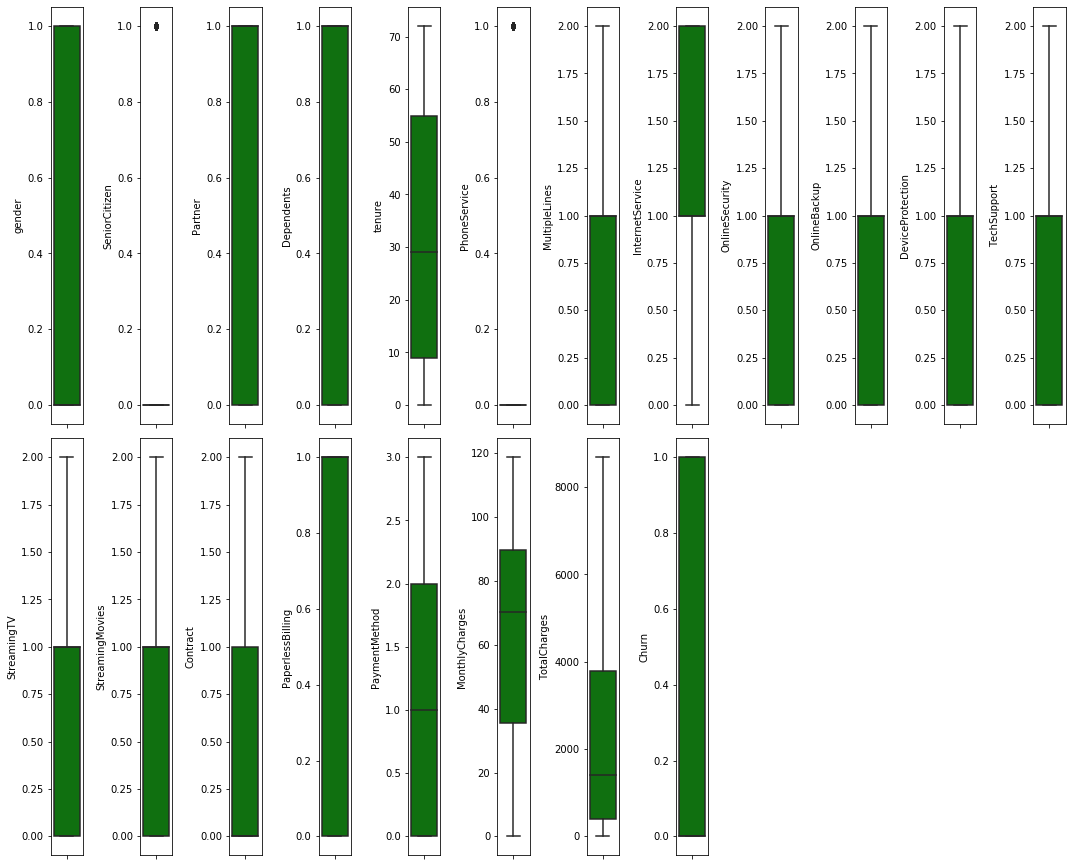

In [48]:
plt.figure(figsize=(15,60))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

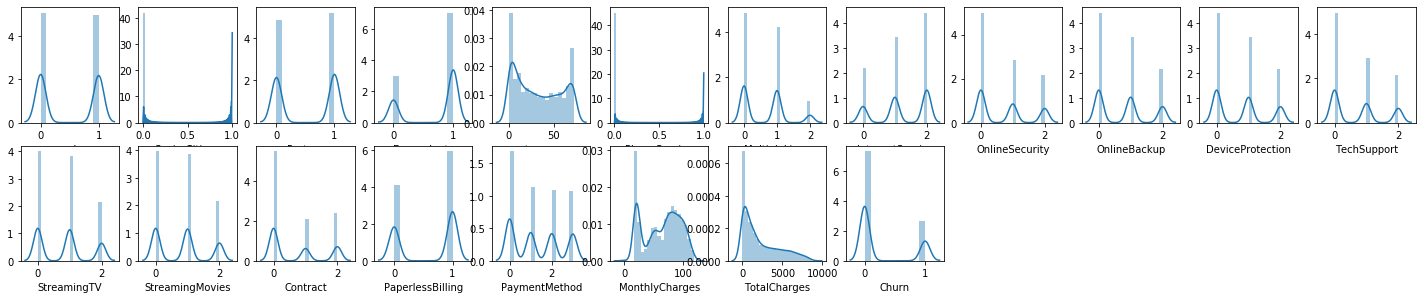

In [49]:
#Checking the normal distribution
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [50]:
#Separating the variables like indenpendent and the target variable
x=df.drop(columns=["Churn"])
y=df[["Churn"]]

In [51]:
#Scaling the data using Standard Scaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)

In [52]:
#Splitting the data into 2 sets training and the test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=86,stratify=y)

In [53]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(5282, 19) (1761, 19)
(5282, 1) (1761, 1)


In [54]:
KNN=KNeighborsClassifier(n_neighbors=4)
SV=SVC()
LR=LogisticRegression()
DTC=DecisionTreeClassifier(random_state=42)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=200,random_state=56)
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()

In [55]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DTC))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('AdaBoostClassifier',ABC))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


Accuracy_score =  0.7722884724588303


Cross_Val_Score =  0.7677134836149394


roc_auc_score =  0.6404588464631689


classification_report
               precision    recall  f1-score   support

           0       0.80      0.92      0.86      1294
           1       0.62      0.36      0.46       467

    accuracy                           0.77      1761
   macro avg       0.71      0.64      0.66      1761
weighted avg       0.75      0.77      0.75      1761



[[1192  102]
 [ 299  168]]


F1_score= 0.4559023066485753


Precision_score= 0.6222222222222222


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_fun

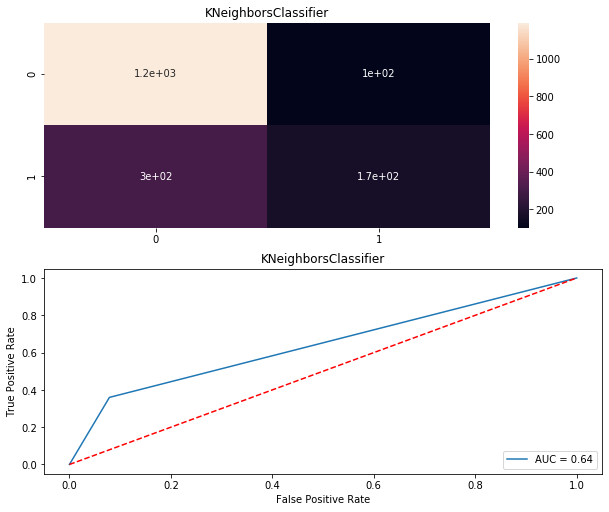

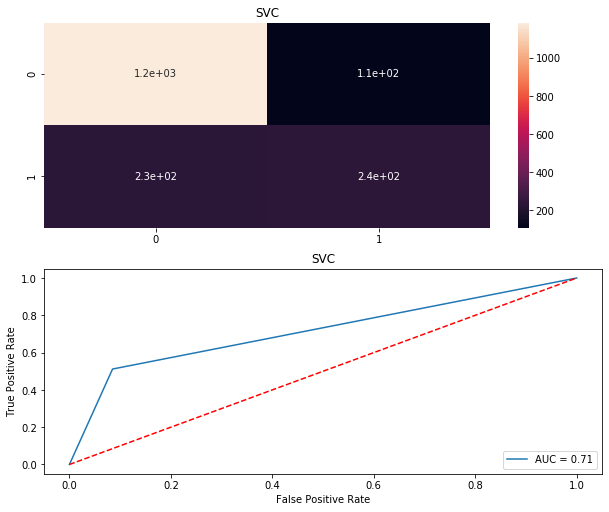

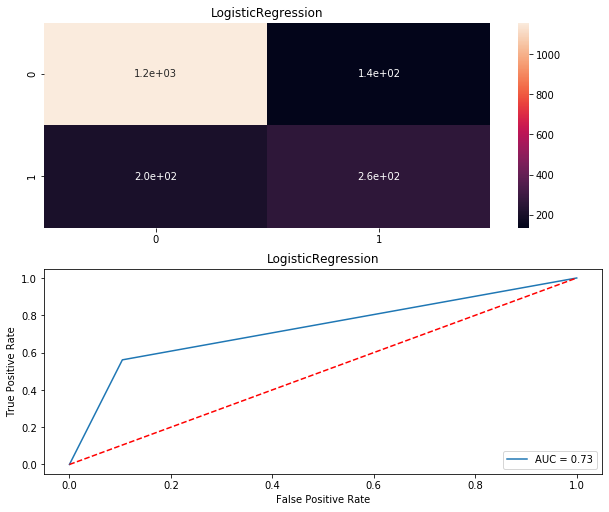

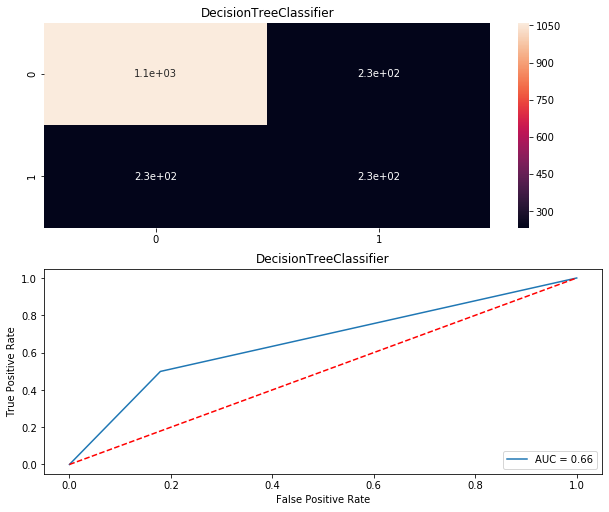

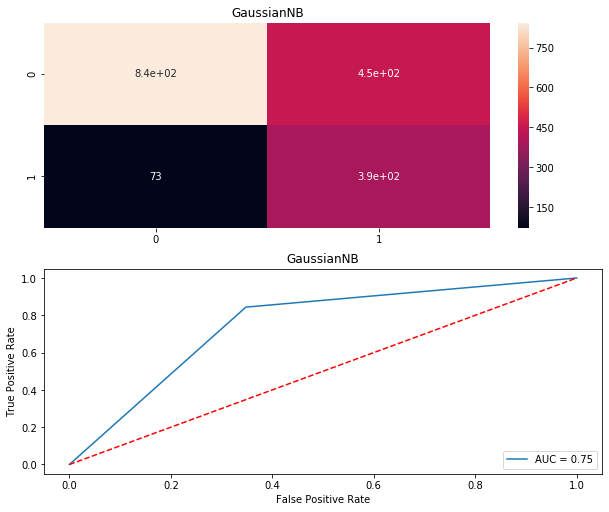

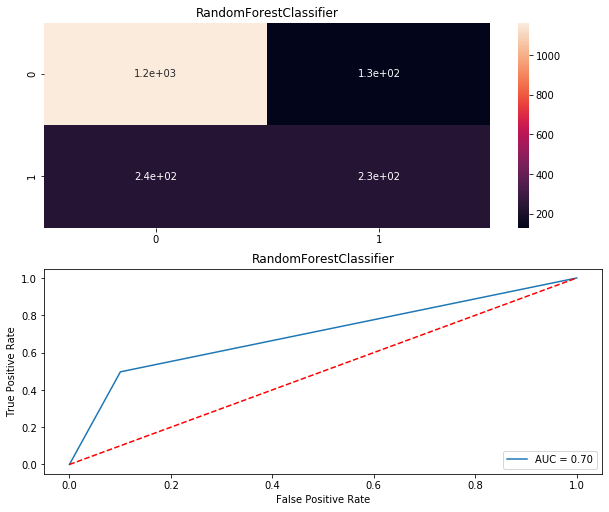

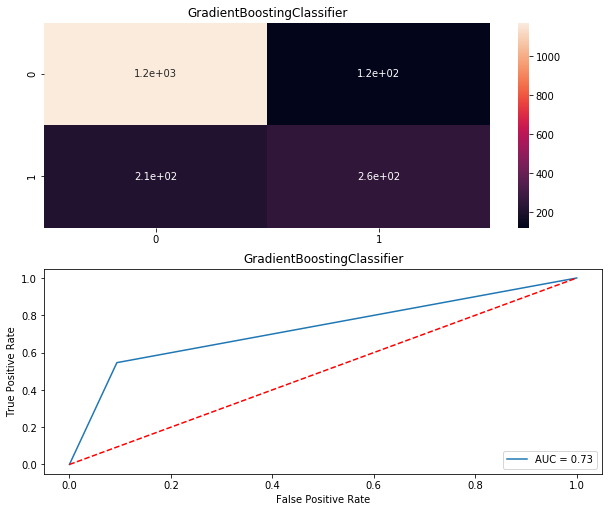

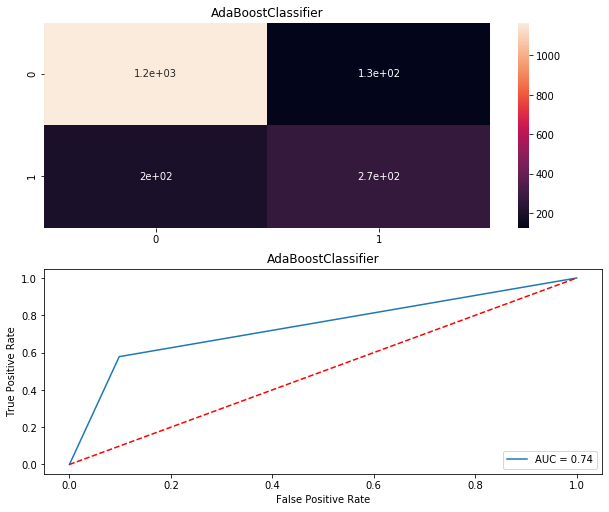

In [56]:
Model = []
score = []
cvs=[]
rocscore=[]
f1score=[]
ps=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    f1s=f1_score(y_test,pred)
    print('F1_score=',f1s)
    f1score.append(f1s*100)
    print('\n')
    precisionscore=precision_score(y_test,pred)
    print('Precision_score=',precisionscore)
    ps.append(precisionscore*100)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [57]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore,'F1_score':f1s,'Precision_score':ps})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve,F1_score,Precision_score
0,KNeighborsClassifier,77.228847,76.771348,64.045885,0.625,62.222222
1,SVC,80.806360,80.391796,71.338479,0.625,68.481375
2,LogisticRegression,80.692788,80.306508,72.835009,0.625,65.994962
3,DecisionTreeClassifier,73.537763,72.185051,65.982015,0.625,50.107527
4,GaussianNB,70.300965,70.935514,74.796210,0.625,46.682464
5,RandomForestClassifier,79.273140,79.426189,69.816217,0.625,64.088398
6,GradientBoostingClassifier,81.090290,80.860083,72.626502,0.625,67.819149
7,AdaBoostClassifier,81.601363,80.491289,74.000659,0.625,68.010076


In [59]:
#Lets use GridsearchCV for hyperparamenter tuning for AdaBoostClassifier
def maxacc_score(regr,x,y):
    max_acc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.25,stratify=y)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        acc_scr=accuracy_score(y_test,y_pred)
        if acc_scr>max_acc_score:
            max_acc_score=acc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state," is ",max_acc_score)
    return final_r_state

In [61]:
pipeline=Pipeline([("ss",StandardScaler()),("ABC",AdaBoostClassifier())])
parameters = {"ABC__n_estimators":[10,100,200,300,400,500]}
clf = GridSearchCV(pipeline, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'ABC__n_estimators': 100}

In [64]:
pipeline_ABC=Pipeline([("ss",StandardScaler()),("ABC",AdaBoostClassifier(n_estimators=100))])
maxacc_score(pipeline_ABC,x,y)

max accuracy score corresponding to  43  is  0.8165814877910278


43

In [58]:
from sklearn.externals import joblib
joblib.dump(ABC,"Telecom_Churn_ABC.pkl")

['Telecom_Churn_ABC.pkl']